<a href="https://colab.research.google.com/github/Ahmed1Rabie/Machine-Learning-Models/blob/main/Small_Image_Classification_Using_Simple_Aritifical_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Small Image Classification Using Simple Aritifical Neural Network

In [ ]:
import tensorflow as tf 
import numpy as np
import pandas as pd 
from tensorflow import keras
import matplotlib.pyplot as plt 

In [ ]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
tf.__version__


'2.9.2'

In [ ]:
tf.test.is_built_with_cuda()


True

Load the dataset

In [ ]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [ ]:
X_test.shape

(10000, 32, 32, 3)

build function to show any train image 

In [ ]:
def plot_sample(n):
  plt.figure(figsize=(2,2))
  plt.imshow(X_train[n])

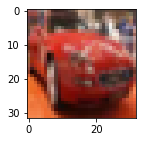

In [ ]:
plot_sample(5)

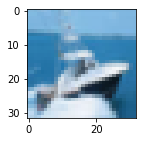

In [ ]:
plot_sample(8)

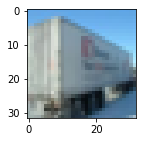

In [ ]:
plot_sample(15)

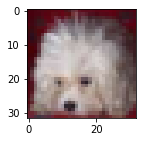

In [ ]:
plot_sample(5555)

In [ ]:
y_train[0]

array([6], dtype=uint8)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
classes[y_train[3][0]]

'deer'

### Scale images


In [ ]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

### do one hotencoder in our data 

In [ ]:
y_train_cateogrical=keras.utils.to_categorical(y=y_train ,num_classes=10,dtype='float32')

In [ ]:
y_test_cateogrical=keras.utils.to_categorical(y=y_test ,num_classes=10,dtype='float32')

In [ ]:
y_train_cateogrical.shape

(50000, 10)

In [ ]:
print(y_train_cateogrical[3])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


### build model

In [ ]:
from tensorflow._api.v2.config import optimizer
model = keras.Sequential([
keras.layers.Flatten(input_shape=(32,32,3)), 
keras.layers.Dense(3000, activation='relu'),
keras.layers.Dense(1000, activation='relu'),
keras.layers.Dense(10, activation='sigmoid')  
])

model.compile(
    optimizer="SGD",
    loss="categorical_crossentropy",
    metrics="accuracy"
)


model.fit(X_train_scaled,y_train_cateogrical,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8132 - accuracy: 0.3530
Epoch 2/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6212 - accuracy: 0.4307
Epoch 3/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5387 - accuracy: 0.4572
Epoch 4/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4800 - accuracy: 0.4786
Epoch 5/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4307 - accuracy: 0.4973
Epoch 6/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3876 - accuracy: 0.5123
Epoch 7/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3492 - accuracy: 0.5277
Epoch 8/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3152 - accuracy: 0.5397
Epoch 9/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2821 - accuracy: 0.5506
Epoch 10/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.250

In [ ]:
y_pred=model.predict(X_test_scaled)

313/313 [==============================] - 1s 2ms/step


 ## make some predictions

In [ ]:
print(classes[np.argmax(model.predict(X_test_scaled)[1])])
print(classes[y_test[1][0]])

313/313 [==============================] - 1s 3ms/step
ship
ship
